### `1. Split the Dataset`

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the feature-selected dataset
df = pd.read_csv('../data/final_heart_disease_dataset.csv')
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### `2. Train & Evaluate Models`

--- Logistic Regression ---
Accuracy: 0.8360655737704918
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        33
           1       0.82      0.82      0.82        28

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

--- Decision Tree ---
Accuracy: 0.6885245901639344
              precision    recall  f1-score   support

           0       0.77      0.61      0.68        33
           1       0.63      0.79      0.70        28

    accuracy                           0.69        61
   macro avg       0.70      0.70      0.69        61
weighted avg       0.70      0.69      0.69        61

--- Random Forest ---
Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.83      0.86      0.84        28

    accuracy           

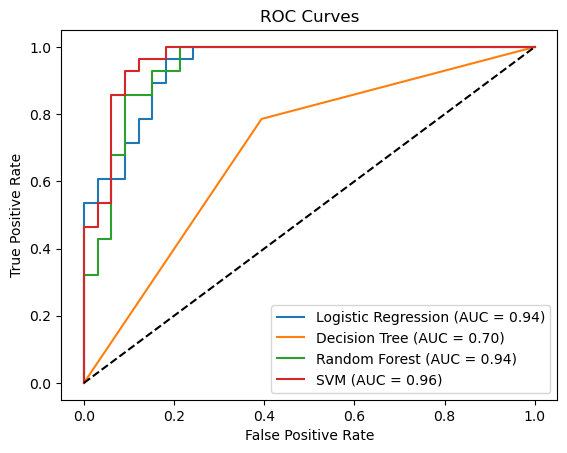

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42) # probability=True for ROC curve
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # ROC Curve and AUC
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Plot ROC curves for all models
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()